### Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
plt.style.use('ggplot')

### Data Analysis

In [18]:
train_data = pd.read_csv('data/traindata.csv')

##### Understanding the dataset

In [19]:
train_data.head(1)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_data.shape

(42000, 785)

We have 42000 samples x 784 pixel columns

##### Extracting data



In [21]:
train_labels = train_data.iloc[:,0].values               #Converting data to Numpy arrays
train_images = train_data.iloc[:,1:].values

train_images.shape

(42000, 784)

Visualizing a training example

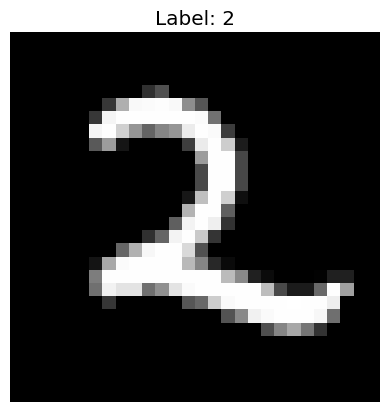

In [22]:
random_no1 = random.randint(0,42000)

image = train_images[random_no1].reshape(28, 28)

#Plotting it
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train_labels[random_no1]}")
plt.axis('off')
plt.show()

Extracting testing data for future use

In [23]:
test_data = pd.read_csv('data/traindata.csv')

In [24]:
test_labels = test_data.iloc[:,0].values
test_images = test_data.iloc[:,1:].values

### Data normalization

Since the values only range from 0-255 and we rely on relu activation function for this project, the most optimal value of normalization is by division of highest value

In [25]:
train_images = train_images/255
test_images = test_images/255

### Architecture of the Neural Network

For this project, the chosen architecture involves

Input layer --> Hidden layer (128 units, relu) --> Hidden layer (64 units, relu) --> Output layer (10 units, linear)

Hence, we initialize the weight and biases for this architecture accordingly

In [26]:
W1 = np.random.randn(784, 128) * 0.01   #Keeping values small for regularization 
W2 = np.random.randn(128, 64) * 0.01
W3 = np.random.randn(64, 10)  * 0.01


In [27]:
b1 = np.zeros(128)
b2 = np.zeros(64)
b3 = np.zeros(10)


### Training the Model by Updating the Weights

In [28]:
from layers import sequential
from utilities import softmax, sparse_categorical_cross_entropy, dense, output_layer

In [29]:
epochs = 10     #10 passes through training data
lr = 0.01   #learning rate 
m = len(train_images)    #number of training examples

for epoch in range(epochs):
    total_loss = 0

    for i in range(m):
        x = train_images[i]
        y = train_labels[i]

        a1 = dense(x, W1, b1)
        a2 = dense(a1, W2, b2)
        z3 = np.dot(a2, W3) + b3
        y_hat = softmax(z3)

        #Loss
        loss = sparse_categorical_cross_entropy(y_hat, y)
        total_loss += loss

        #Backpropagation
        dz3 = y_hat.copy()
        dz3[y] -= 1

        dW3 = np.outer(a2, dz3)
        db3 = dz3

        da2 = np.dot(W3, dz3)
        dz2 = da2 * (a2 > 0)

        dW2 = np.outer(a1, dz2)
        db2 = dz2

        da1 = np.dot(W2, dz2)
        dz1 = da1 * (a1 > 0)

        dW1 = np.outer(x, dz1)
        db1 = dz1

        # Gradient descent update
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    cost = total_loss/m
    print(f"Epoch {epoch+1}, Total cost: {cost:.4f}")



Epoch 1, Total cost: 0.5220
Epoch 2, Total cost: 0.1400
Epoch 3, Total cost: 0.0936
Epoch 4, Total cost: 0.0686
Epoch 5, Total cost: 0.0571
Epoch 6, Total cost: 0.0456
Epoch 7, Total cost: 0.0419
Epoch 8, Total cost: 0.0334
Epoch 9, Total cost: 0.0265
Epoch 10, Total cost: 0.0286


### Making Predictions on the testing data

In [30]:
from utilities import predict

In [32]:
correct = 0
total = len(test_images)

for i in range(total):
    x = test_images[i]
    y = test_labels[i]

    y_pred = predict(x, W1, b1, W2, b2, W3, b3)
    if y_pred == y:
        correct += 1

test_accuracy = (correct / total) * 100
print(f"Test Accuracy Percentage: {test_accuracy:.4f}")


Test Accuracy Percentage: 99.1429
